what data preprocessing can i do in this file (day.csv)<br><br>

Based on the data you've loaded and the analysis you've done so far, here are some additional data preprocessing steps you could consider:

<b>Handling the 'dteday' column</b>: You currently have 'dteday' as an object type. You could convert it to a datetime object to extract time-based features like the day of the week, month, or year more easily if they are not already represented by other columns. While you have 'yr', 'mnth', and 'weekday' as separate features, converting 'dteday' might be useful for time series analysis or creating other time-based features.
<br><br><b>Feature Scaling</b>: While some of your features appear to be on a similar scale (like 'temp' and 'atemp'), others might have different ranges. Scaling features (e.g., using StandardScaler or MinMaxScaler) can sometimes improve the performance of models like Linear Regression or Neural Networks, which are sensitive to the scale of input features.
<br><br><b>Outlier Detection and Handling</b>: You could visualize the data (e.g., using box plots) to identify potential outliers in numerical features and decide on a strategy to handle them (e.g., removing them, transforming them, or using robust models).
<br><br><b>Interaction Terms</b>: Based on your understanding of the data, you might consider creating interaction terms between features that you believe could have a combined effect on the target variable ('cnt'). For example, the effect of 'temp' on bike rentals might be different depending on the 'weathersit'.
<br><br><b>Polynomial Features</b>: For features that show a non-linear relationship with the target variable in the scatter plots, you could consider creating polynomial features to capture these non-linearities.
Which of these preprocessing steps would you like to explore first?

In [ ]:
import pandas as pd
import numpy as np

!rm -rf CodeAI_CoCom
!git clone https://github.com/aBDULQADARmANASAWALA/CodeAI_CoCom

# from google.colab import drive
# drive.mount('/content/drive')

Cloning into 'CodeAI_CoCom'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 38.94 KiB | 9.73 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
# PATH = '/content/drive/MyDrive/Colab Notebooks/day.csv'
PATH = '/content/CodeAI_CoCom/day.csv'
data = pd.read_csv(PATH)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

### season vs casual & reg

In [ ]:
fig = px.histogram(data, x='casual', nbins=100, marginal='box', color_discrete_sequence=['red', 'yellow', 'blue', 'green'], color='season')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(data, x='registered', nbins=100, marginal='box', color_discrete_sequence=['red', 'yellow', 'blue', 'green'], color='season')
fig.update_layout(bargap=0.1)
fig.show()

### yr vs casual & reg

In [ ]:
fig = px.histogram(data, x='casual', nbins=100, marginal='box', color_discrete_sequence=['red', 'green'], color='yr')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(data, x='registered', nbins=100, marginal='box', color_discrete_sequence=['red', 'green'], color='yr')
fig.update_layout(bargap=0.1)
fig.show()

### holiday vs casual & regitered

In [ ]:
fig = px.histogram(data, x='casual', nbins=100, marginal='box', color='holiday')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(data, x='registered', nbins=100, marginal='box', color='holiday')
fig.update_layout(bargap=0.1)
fig.show()

### mnth vs casual & reg

In [ ]:
fig = px.histogram(data, x='casual', nbins=100, marginal='box', color='mnth')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(data, x='registered', nbins=100, marginal='box', color='mnth')
fig.update_layout(bargap=0.1)
fig.show()

### .

In [ ]:
fig = px.histogram(data, x='casual', nbins=100, marginal='box', color='season', pattern_shape='yr')
fig.update_layout(bargap=0.1)
fig.show()

### .

### .

In [ ]:
correlation_matrix = data.corr(numeric_only=True)
display(correlation_matrix['cnt'].sort_values(ascending=False))

,cnt
cnt,1.000000
registered,0.945517
casual,0.672804
atemp,0.631066
instant,0.628830
temp,0.627494
yr,0.566710
season,0.406100
mnth,0.279977
weekday,0.067443


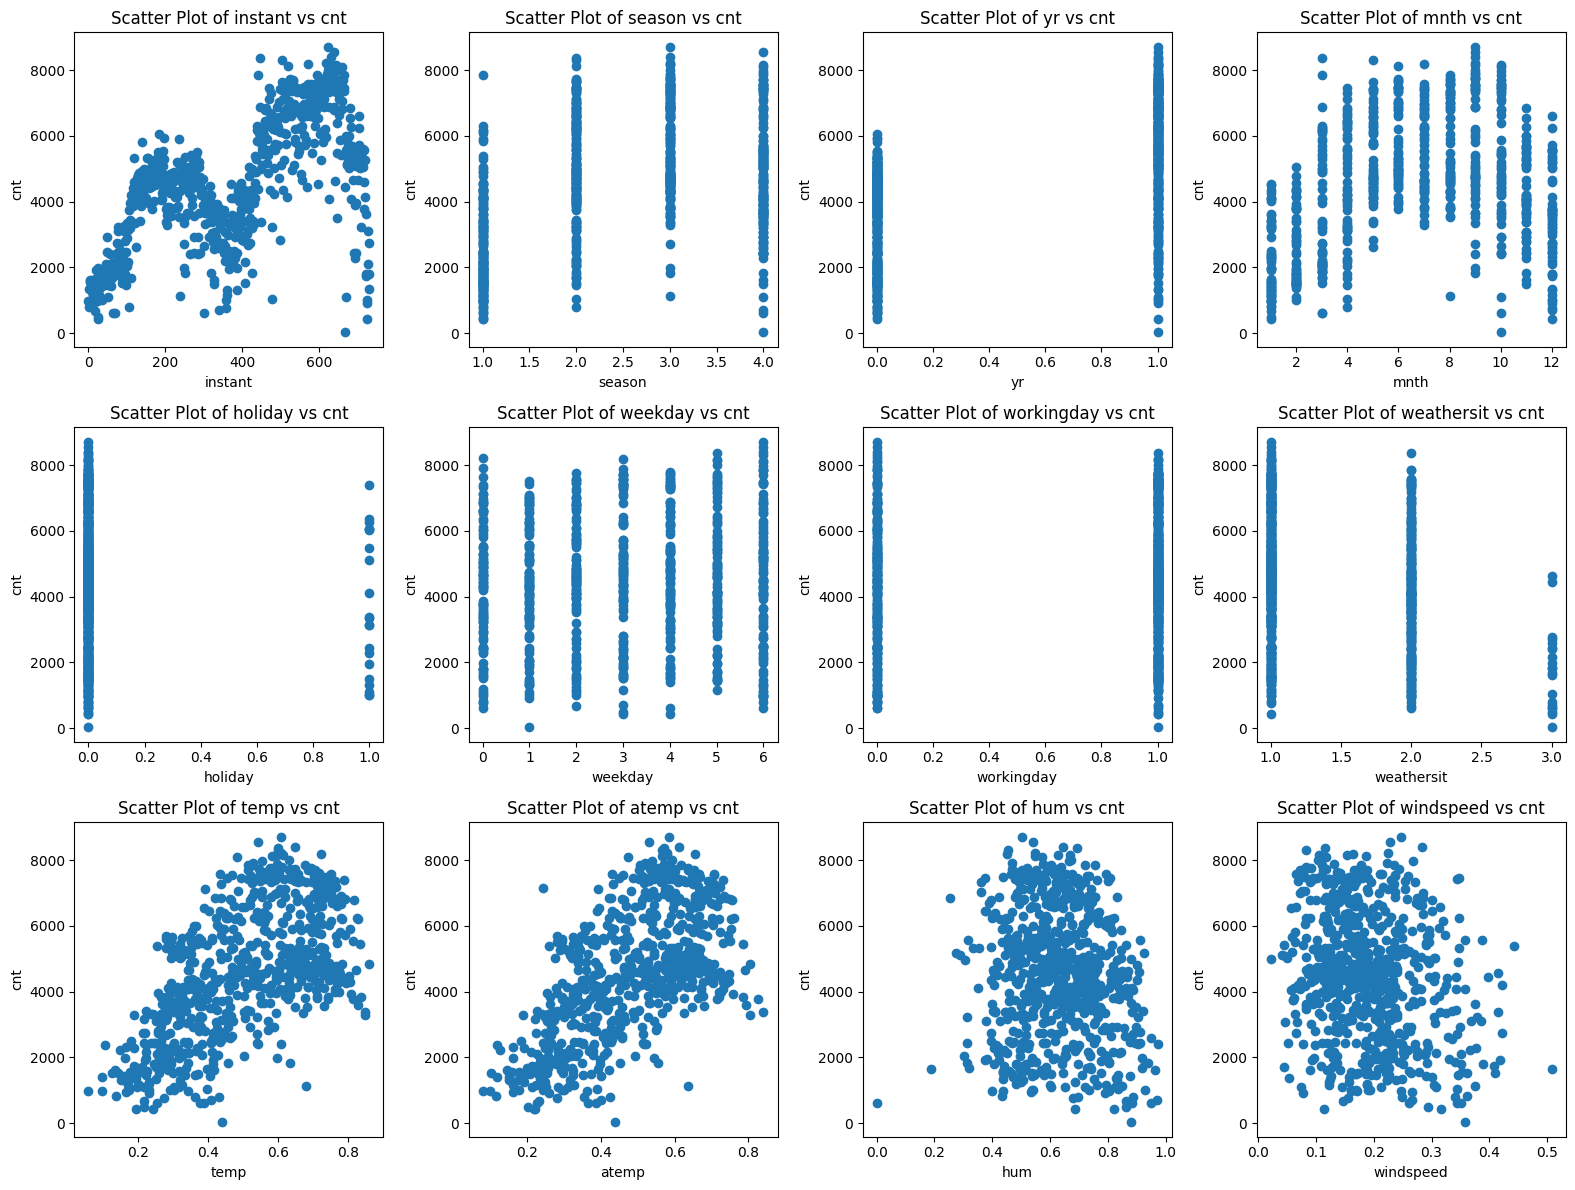

In [ ]:
import matplotlib.pyplot as plt
import math

# Get all columns except 'registered', 'casual', and 'cnt'
columns_to_plot = [col for col in data.columns if col not in ['registered', 'casual', 'cnt', 'dteday']]

# Determine the number of rows and columns for subplots
n_columns = 4
n_rows = math.ceil(len(columns_to_plot) / n_columns)

# Create figures and subplots
fig, axes = plt.subplots(n_rows, n_columns, figsize=(16, n_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Iterate through columns and create scatter plots
for i, col in enumerate(columns_to_plot):
    axes[i].scatter(data[col], data['cnt'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('cnt')
    axes[i].set_title(f'Scatter Plot of {col} vs cnt')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Encoding the categorical data to OneHotEnconding instead of the OrdinalEncoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the 'weathersit' column using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(data[['weathersit', 'season', 'yr', 'mnth', 'weekday']])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['weathersit', 'season', 'yr', 'mnth', 'weekday']))

# Concatenate the original DataFrame (excluding the original 'weathersit' column) with the encoded DataFrame
data = pd.concat([data.drop(columns=['weathersit', 'season', 'yr', 'mnth', 'weekday']), encoded_df], axis=1)

In [ ]:
correlation_matrix = data.corr(numeric_only=True)
display(correlation_matrix['cnt'].sort_values(ascending=False))

,cnt
cnt,1.000000
registered,0.945517
casual,0.672804
atemp,0.631066
instant,0.628830
temp,0.627494
yr_1,0.566710
season_3,0.346487
weathersit_1,0.252870
mnth_6,0.195866


From the above correlation matrix, we conclude that casual and registered users ofcourse influence the most. Apart from them, temp and atemp have an increasing relationship with cnt.

In [ ]:
# Update the feature set X
X = data.drop(columns=['cnt', 'instant', 'dteday', 'casual', 'registered', 'temp', 'workingday', 'holiday'])

y=data['cnt']

display(X.head())

,atemp,hum,windspeed,weathersit_1,weathersit_2,weathersit_3,season_1,season_2,season_3,season_4,...,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.363625,0.805833,0.160446,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.353739,0.696087,0.248539,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.189405,0.437273,0.248309,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.212122,0.590435,0.160296,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.229270,0.436957,0.186900,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Running a Linear Regressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression(n_jobs=-1)

### Root Mean squared error

In [ ]:
scores = -cross_val_score(reg, X, y, cv=50, scoring='neg_root_mean_squared_error')
# print(f"Cross-Validation Scores: {scores}")
print(f"Mean Cross-Validation Score: {scores.mean()}")

Mean Cross-Validation Score: 800.0052368225577


### Mean Absolute Error

In [ ]:
scores = -cross_val_score(reg, X, y, cv=50, scoring='neg_mean_absolute_error')
# print(f"Cross-Validation Scores: {scores}")
print(f"Mean Cross-Validation Score: {scores.mean()}")

Mean Cross-Validation Score: 634.1093588618828


### Median Absolute Error

In [ ]:
scores = -cross_val_score(reg, X, y, cv=50, scoring='neg_median_absolute_error')
# print(f"Cross-Validation Scores: {scores}")
print(f"Mean Cross-Validation Score: {scores.mean()}")

Mean Cross-Validation Score: 532.3235656362291


### R2 Error

In [ ]:
scores = cross_val_score(reg, X, y, cv=50, scoring='r2')
# print(f"Cross-Validation Scores: {scores}")
print(f"Mean Cross-Validation Score: {scores.mean()}")

Mean Cross-Validation Score: -0.32219879534154267


## Running a Rigde Regression (with alpha=2.825)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = {'alpha': [i/10 for i in range(51)]}
ridge_reg = Ridge()

# Create GridSearchCV object for all four metrics
grid_search_rmse = GridSearchCV(ridge_reg, param_grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search_mae = GridSearchCV(ridge_reg, param_grid, cv=10, scoring='neg_mean_absolute_error')
grid_search_mdae = GridSearchCV(ridge_reg, param_grid, cv=10, scoring='neg_median_absolute_error')
grid_search_r2 = GridSearchCV(ridge_reg, param_grid, cv=10, scoring='r2')

grid_searches = [grid_search_rmse, grid_search_mae, grid_search_mdae, grid_search_r2]

# Fit the grid search to your data
grid_search_rmse.fit(X, y)
grid_search_mae.fit(X, y)
grid_search_mdae.fit(X, y)
grid_search_r2.fit(X, y)

# Print the mean alpha value
mean = 0
for grid_search in grid_searches:
    mean += grid_search.best_params_['alpha']
print(f'Mean alpha value: {mean/4}')

Mean alpha value: 2.825


In [ ]:
for grid_search in grid_searches:
    print(grid_search.best_params_['alpha'])
    print(grid_search.best_score_)

2.7
-881.5634127512669
3.0
-676.0210015133464
0.6
-536.3459356956471
5.0
0.15561974369801623


### Root Mean Squared Error

In [ ]:
scores = -cross_val_score(ridge_reg, X, y, cv=10, scoring='neg_root_mean_squared_error')
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation scores: {scores.mean()}')

Cross-validation scores: [ 512.1328244   860.64649746  712.87242342  751.18207193  851.27867236
  689.83719397 1078.90376324  949.86361212  972.08679148 1436.88729464]
Mean cross-validation scores: 881.5691145031151


### Absolute Mean Error

In [ ]:
scores = -cross_val_score(ridge_reg, X, y, cv=10, scoring='neg_mean_absolute_error')
print(f'Cross_validation scores: {scores}')
print(f'Mean cross-validation scores: {scores.mean()}')

Cross_validation scores: [388.63881747 672.91551878 545.55747179 513.88257838 697.07884808
 546.48194907 823.39866448 754.8142117  829.85136964 988.17813077]
Mean cross-validation scores: 676.0797560167036


### Median Absolute Error

In [ ]:
scores = -cross_val_score(ridge_reg, X, y, cv=10, scoring='neg_median_absolute_error')
print(f'Cross-validation scores: {scores}')
print(f'Mean cross_validation scores: {scores.mean()}')

Cross-validation scores: [333.98104548 563.92044392 480.23566401 337.55431702 633.28339548
 463.44459788 612.45451001 678.72056693 821.89305113 546.56476453]
Mean cross_validation scores: 547.2052356399279


### R2 Error

In [ ]:
scores = cross_val_score(ridge_reg, X, y, cv=10, scoring='r2')
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation scores: {scores.mean()}')

Cross-validation scores: [-0.11712524  0.41062218 -0.58059257  0.38633462  0.21202914  0.53808545
  0.21125501 -0.20495553  0.08228194  0.40388688]
Mean cross-validation scores: 0.134182188794686


## Running a K-Nearest Neighbour Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=50)

### Root Mean Squared Error

In [ ]:
scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f'cross-validation scores: {scores}')
print(f'mean scores: {scores.mean()}')

cross-validation scores: [1847.2253997  1053.99838163 1037.35211607 1573.45011253 1699.65396441]
mean scores: 1442.3359948692623


### Mean Absolute Error

In [ ]:
scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f'cross-validation scores: {scores}')
print(f'mean scores: {scores.mean()}')

cross-validation scores: [1704.81061224  840.31315068  825.64821918 1384.74109589 1518.54      ]
mean scores: 1254.8106155996645


### Median Absolute Error

In [ ]:
scores = -cross_val_score(knn, X, y, cv=10, scoring='neg_median_absolute_error')
print(f'cross-validation scores: {scores}')
print(f'mean scores: {scores.mean()}')

cross-validation scores: [1762.31 1087.34  830.76  756.12 1018.96  358.82  868.1   987.34 1598.34
  696.66]
mean scores: 996.4750000000001


### R2 Error

In [ ]:
scores = -cross_val_score(knn, X, y, cv=10, scoring='r2')
print(f'cross-validation scores: {scores}')
print(f'mean scores: {scores.mean()}')

cross-validation scores: [12.61490583  0.41177065  2.61654855  0.20910617  0.73056561 -0.54921868
  0.12879781  0.64463422  1.70728754 -0.43708465]
mean scores: 1.8077313048000696


## Running a Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)

### Root Mean Squared Error

In [ ]:
scores = -cross_val_score(rf_regressor, X, y, cv=10, scoring='neg_root_mean_squared_error')
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')

Cross-validation scores: [ 829.23027454  800.83186772  543.12015382  843.04839247  937.0237638
 1165.54938482  992.33101742  789.75049321  990.27989883 1112.00585722]
Mean cross-validation score: 900.3171103857219


### Mean Absolute Error

In [ ]:
scores = -cross_val_score(rf_regressor, X, y, cv=10, scoring='neg_mean_absolute_error')
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')

Cross-validation scores: [730.87655405 650.39369863 419.2489726  636.08178082 825.19561644
 994.95184932 770.50410959 585.0689726  755.79821918 741.74006849]
Mean cross-validation score: 710.9859841725288


### Median Absolute Error

In [ ]:
scores = -cross_val_score(rf_regressor, X, y, cv=10, scoring='neg_median_absolute_error')
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')

Cross-validation scores: [770.5725 528.665  380.275  478.31   923.435  947.545  565.325  397.925
 611.605  432.18  ]
Mean cross-validation score: 603.58375


### R2 Error

In [ ]:
scores = -cross_val_score(rf_regressor, X, y, cv=10, scoring='r2')
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation scores: {scores.mean()}')

Cross-validation scores: [ 1.92878128 -0.48969847 -0.08253788 -0.22705925 -0.04529794  0.31865077
 -0.33275653 -0.16703198 -0.04760935 -0.64297599]
Mean cross-validation scores: 0.02124646449208235


From the above metric results, we can conclude that using a Ridge Regression or Linear Regression or Random Forest Regressor with the respective parameters gives the best result.

## Gradient Boosting

## Neural Network Regressor

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the neural network model
model = Sequential([
    Input(shape=(X_train.shape[1],)), # Use Input layer to specify input shape
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1) # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, verbose=0)

print("Neural Network Regressor trained.")

Neural Network Regressor trained.


In [ ]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Make predictions on the test set
y_pred_nn = model.predict(X_test)

# Calculate the metrics
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = root_mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Mean Absolute Error (Neural Network): {mae_nn}")
print(f"Root Mean Squared Error (Neural Network): {mse_nn}")
print(f"R-squared (Neural Network): {r2_nn}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Mean Absolute Error (Neural Network): 582.0584716796875
Root Mean Squared Error (Neural Network): 801.4107666015625
R-squared (Neural Network): 0.8398308753967285
